# Requirements

In [5]:
# Add as many imports as you need.
import pandas as pd
import numpy as np
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import missingno as msno
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Laboratory Exercise - Run Mode (8 points)

## The Gym Dataset
The dataset contains detailed information on 973 gym members' workout sessions, including their exercise routines, physical attributes, and fitness metrics. The features include age, gender, weight, height, heart rate data (maxiumum BPM, average BPM, and resting BPM), session duration, calories burned, workout type, body fat percentage, water intake, workout frequency, and experience level. Each feature provides insights into different aspects of a gym member's workout habits, physical health, and overall fitness progression. These attributes, except for the 'burned calories', can be used as input variables for analysis and modeling. The 'burned calories' attribute serves as the target variable, representing the total calories burned during each workout session. This dataset offers a comprehensive set of features, making it ideal for exploring and understanding the factors that influence calorie burn during workouts.

Load the dataset into a `pandas` data frame.

In [7]:
# Write your code here. Add as many boxes as you need.
data = pd.read_csv('gym_members_exercise_tracking.csv')
data.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


Preprocess the input and the output variables appropriately.

In [ ]:
# Write your code here. Add as many boxes as you need.

Explore the dataset using visualizations of your choice.

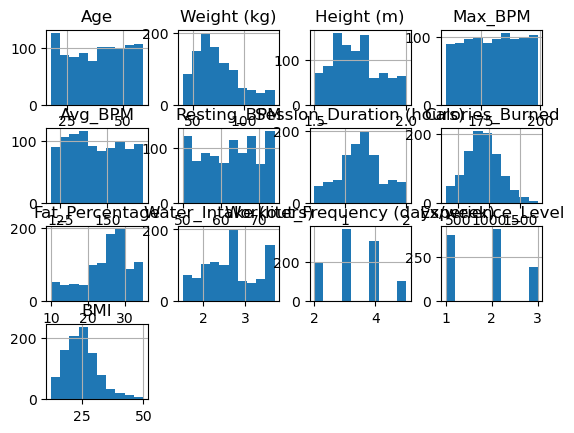

In [9]:
# Write your code here. Add as many boxes as you need.
data.hist()
plt.show()

Check if the dataset is balanced.

In [11]:
# Write your code here. Add as many boxes as you need.
data['Calories_Burned'].value_counts()

Calories_Burned
1025.0    6
883.0     6
875.0     5
832.0     5
711.0     4
         ..
1029.0    1
1187.0    1
482.0     1
1096.0    1
542.0     1
Name: count, Length: 621, dtype: int64

## Detecting Missing Values
Calculate the percentage of missing values present in each column of the dataset.

In [13]:
# Write your code here. Add as many boxes as you need.
data.isnull().sum()

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64

## Understanding the Causes Behind Missing Values
Using visualization tools such as heatmaps, and dendrograms, illustrate the interdependence between attributes with missing values. Also, visualize the distribution of the missing values within the dataset using matrices and bar charts.

C:\Users\kolov\anaconda3\Lib\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
C:\Users\kolov\anaconda3\Lib\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


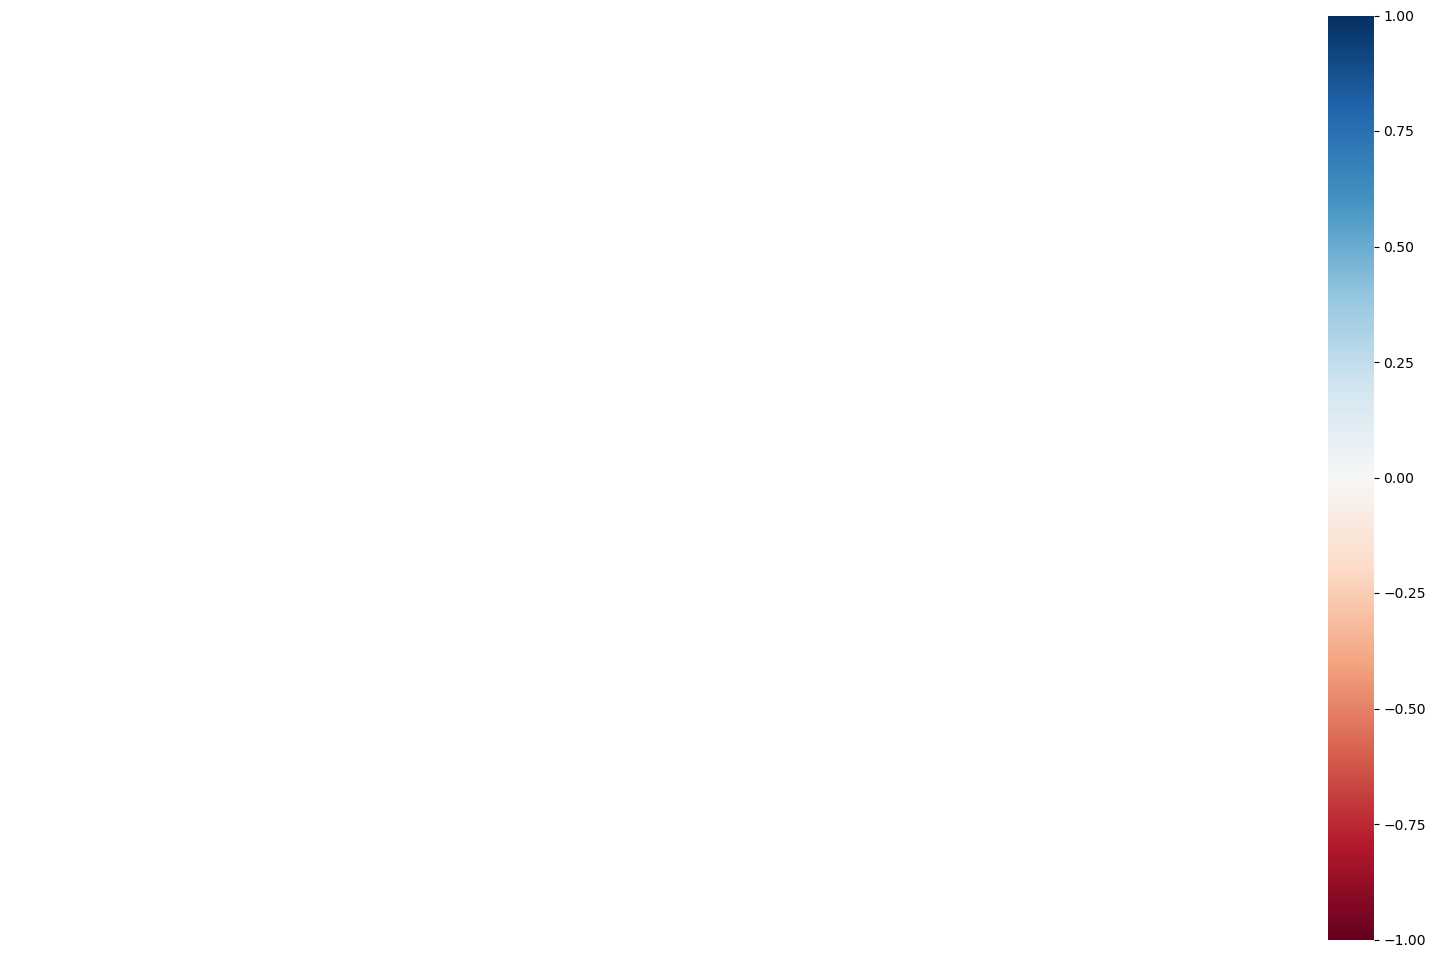

In [15]:
# Write your code here. Add as many boxes as you need.
msno.heatmap(data)
plt.show()

## Handling the Missing Values
Handle the missing values using suitable method based on the insights obtained from the various visualizations.

In [46]:
# Write your code here. Add as many boxes as you need.
enc = LabelEncoder()
data['Gender'] = enc.fit_transform(data['Gender'])
enc = LabelEncoder()
data['Workout_Type'] = enc.fit_transform(data['Workout_Type'])
data.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,1,88.3,1.71,180,157,60,1.69,1313.0,3,12.6,3.5,4,3,30.20
1,46,0,74.9,1.53,179,151,66,1.30,883.0,1,33.9,2.1,4,2,32.00
2,32,0,68.1,1.66,167,122,54,1.11,677.0,0,33.4,2.3,4,2,24.71
3,25,1,53.2,1.70,190,164,56,0.59,532.0,2,28.8,2.1,3,1,18.41
4,38,1,46.1,1.79,188,158,68,0.64,556.0,2,29.2,2.8,3,1,14.39


## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

In [49]:
# Write your code here. Add as many boxes as you need.
input = data.copy()
input.drop(['Calories_Burned'],axis=1,inplace=True)
input.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,1,88.3,1.71,180,157,60,1.69,3,12.6,3.5,4,3,30.20
1,46,0,74.9,1.53,179,151,66,1.30,1,33.9,2.1,4,2,32.00
2,32,0,68.1,1.66,167,122,54,1.11,0,33.4,2.3,4,2,24.71
3,25,1,53.2,1.70,190,164,56,0.59,2,28.8,2.1,3,1,18.41
4,38,1,46.1,1.79,188,158,68,0.64,2,29.2,2.8,3,1,14.39


In [51]:
target = data.copy()['Calories_Burned']
target.head()

0    1313.0
1     883.0
2     677.0
3     532.0
4     556.0
Name: Calories_Burned, dtype: float64

In [3]:
X_train, X_test, Y_train, Y_test = train_test_split(input, target, test_size=0.2)

NameError: name 'train_test_split' is not defined

## Feature Scaling
Standardize the features appropriately.

In [56]:
# Write your code here. Add as many boxes as you need.

## Model Selection

Choose and train an approriate model for the given task.

In [60]:
# Write your code here. Add as many boxes as you need.
from xgboost import XGBRegressor

In [62]:
model = XGBRegressor(max_depth=5)
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Use the trained model to make predictions for the test set.

In [64]:
# Write your code here. Add as many boxes as you need.
y_pred = model.predict(X_test)

Assess the performance of the model by using different classification metrics.

In [2]:
# Write your code here. Add as many boxes as you need.
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print(r2_score(Y_test,y_pred))

NameError: name 'Y_test' is not defined

# Laboratory Exercise - Bonus Task (+ 2 points)

As part of the bonus task in this laboratory assignment, your objective is to fine-tune at least one hyper-parameter using a cross-validation with grid search. This involves systematically experimenting with various values for the hyper-parameter(s) and evaluating the model's performance using cross-validation. Upon determining the most suitable value(s) for the hyper-parameter(s), evaluate the model's performance on a test set for final assessment.

Hint: Use the `GridCVSearch` from the `scikit-learn` library. Check the documentation at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html.

## Dataset Splitting
Partition the dataset into training and testing sets with an 90:10 ratio.

In [74]:
# Write your code here. Add as many boxes as you need.
X_train, X_test, Y_train, Y_test = train_test_split(input, target, test_size=0.1)

## Feature Scaling
Standardize the features appropriately.

## Fine-tuning the Hyperparameters
Experiment with various values for the chosen hyperparameter(s) and evaluate the model's performance using cross-validation.

In [84]:
# Write your code here. Add as many boxes as you need.
param_grid = {
    'learning_rate' :[0.1,0.9,0.5],
    'colsample_bylevel': [0.6,0.7,0.8],
    'max_depth' :[10,8,15],
    'n_estimators': [100,200,50]
}
gs = GridSearchCV(estimator=model,param_grid=param_grid,cv=5)
gs.fit(X_train,Y_train)
print(gs.best_params_)
y_pred = gs.best_estimator_.predict(X_test)
print(r2_score(Y_test,y_pred))
print(gs.best_estimator_.score(X_train, Y_train))  # Висока точност на тренинг
print(gs.best_estimator_.score(X_test, Y_test))

{'colsample_bylevel': 0.7, 'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 200}
0.9877873290068895
0.9999998609637597
0.9877873290068895


## Final Assessment of the Model Performance
Upon determining the most suitable hyperparameter(s), evaluate the model's performance on a test set for final assessment.

In [ ]:
# Write your code here. Add as many boxes as you need.